In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('conversion_project.csv')

In [3]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [26]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


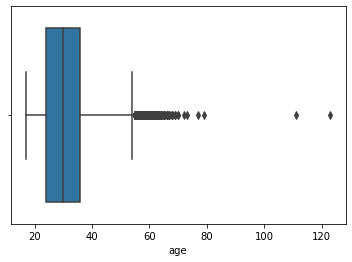

In [40]:
sns.boxplot(data.age)

In [6]:
data_dummy  = pd.get_dummies(data)

In [7]:
data_dummy.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1


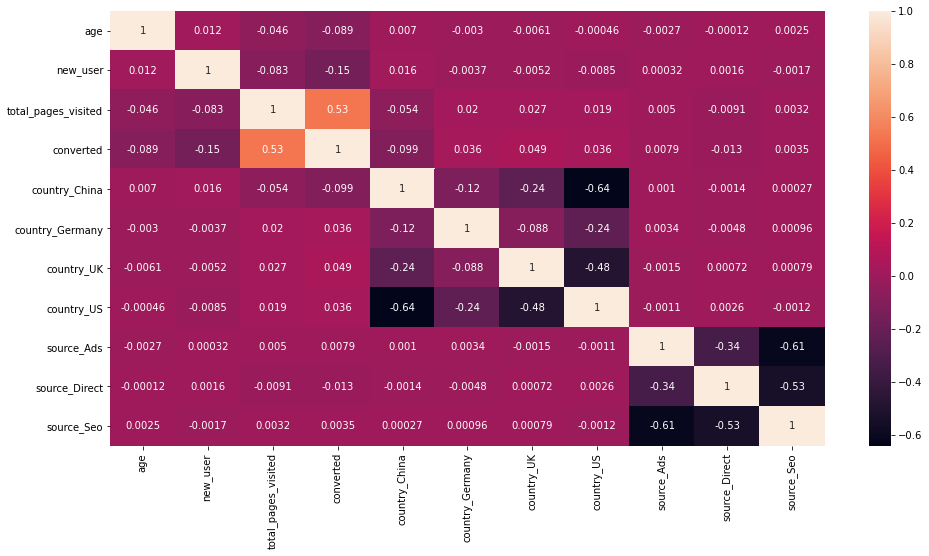

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.heatmap(data_dummy.corr(), annot=True)
#plt.tight_layout()

In [20]:
data_dummy.converted.value_counts()

0    306000
1     10200
Name: converted, dtype: int64

([<matplotlib.axis.XTick at 0x1dda787cd88>,
 [Text(0, 0, 'not converted'), Text(0, 0, 'converted')])

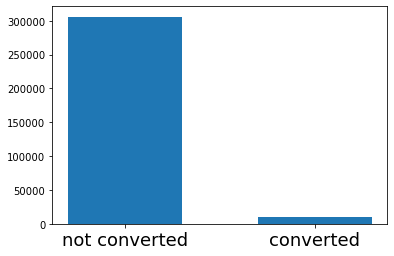

In [25]:
plt.bar([0, 1], data_dummy.converted.value_counts(), width=0.6)
plt.xticks([0, 1], ['not converted', 'converted'], fontsize=18)

In [33]:
data.country.value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

([<matplotlib.axis.XTick at 0x1dda9ca3608>,
 [Text(0, 0, 'US'),
  Text(0, 0, 'China'),
  Text(0, 0, 'UK'),
  Text(0, 0, 'Germany')])

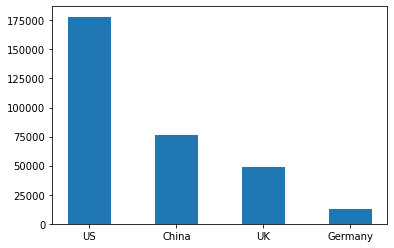

In [34]:
plt.bar(range(4), data.country.value_counts(), width=0.5)
plt.xticks(range(4), data.country.value_counts().index)

In [35]:
data.new_user.value_counts()

1    216744
0     99456
Name: new_user, dtype: int64

In [45]:
converted_ratio = data.groupby(['country']).converted.value_counts()

([<matplotlib.axis.XTick at 0x1ddaa917b08>,
 [Text(0, 0, 'UK'),
  Text(0, 0, 'US'),
  Text(0, 0, 'China'),
  Text(0, 0, 'Germany')])

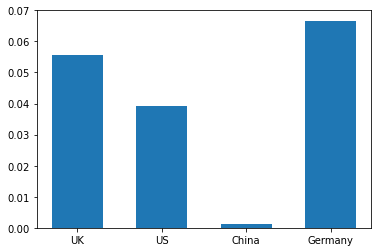

In [52]:
# plot the country-wise convertion rate, 
# China has a quite low rate while have a large user base.
rate = {}
for country in data.country.unique():
    rate[country] = converted_ratio[country][1]/converted_ratio[country][0]
plt.bar(range(len(rate)), rate.values(), width=0.6)
plt.xticks(range(len(rate)), rate.keys())

Note it is primariry about conversion rate, let's take a look at the effect of other factors

### Age

In [58]:
data.age.sort_values()[::-1]

90928     123
295581    111
265167     79
192644     77
154217     73
         ... 
39340      17
90844      17
118149     17
97994      17
229166     17
Name: age, Length: 316200, dtype: int64

In [59]:
# drop the ages larger than 79
df = data[data.age<=79]

In [60]:
df.age.describe()

count    316198.000000
mean         30.569311
std           8.268958
min          17.000000
25%          24.000000
50%          30.000000
75%          36.000000
max          79.000000
Name: age, dtype: float64

In [76]:
age_rate = df.groupby(['age']).converted.value_counts()

In [93]:
age_ratio = {}
for age in df.age.unique():
    try:
        age_ratio[age] = age_rate[age][1]/(age_rate[age][0]+age_rate[age][1])
    except:
        age_ratio[age] = 0
        pass

<BarContainer object of 58 artists>

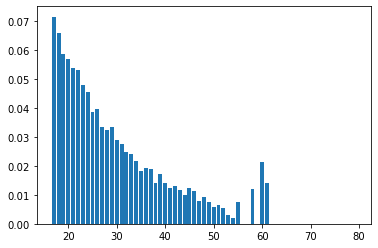

In [94]:
# plot the trends of conversion rate versus age
# it generally decreases monotonously w/r age
plt.bar(age_ratio.keys(), age_ratio.values())

### source

In [96]:
source_rate = df.groupby(['source']).converted.value_counts()

([<matplotlib.axis.XTick at 0x1ddb0a48b08>,
 [Text(0, 0, 'Ads'), Text(0, 0, 'Seo'), Text(0, 0, 'Direct')])

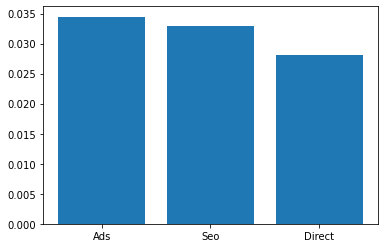

In [100]:
# plot the conversion rate w/r to source
# which is generally constant
source_ratio = {}
for source in df.source.unique():
    source_ratio[source] = source_rate[source][1]/(source_rate[source][1]+source_rate[source][0])
plt.bar(range(len(source_ratio)), source_ratio.values())
plt.xticks(range(len(source_ratio)), source_ratio.keys())

### total page visited

In [101]:
page_visited_rate = df.groupby(['total_pages_visited']).converted.value_counts()

In [103]:
page_v_ratio = {}
for time in df.total_pages_visited.unique():
    try:
        page_v_ratio[time] = page_visited_rate[time][1]/(page_visited_rate[time][1]+page_visited_rate[time][0])
    except:
        try:
            page_visited_rate[time][0]
            page_v_ratio[time] = 0
        except:
            page_v_ratio[time] = 1

<BarContainer object of 29 artists>

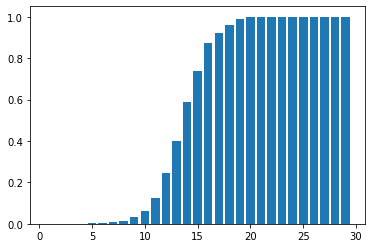

In [104]:
# converstion rate increases with total page visited
plt.bar(page_v_ratio.keys(), page_v_ratio.values())

### New user

In [105]:
# plot the number of new users v.s. old users
newuser_rate = df.groupby(['new_user']).converted.value_counts()

In [107]:
newuser_ratio = {}
for nuser in df.new_user.unique():
    newuser_ratio[nuser] = newuser_rate[nuser][1]/(newuser_rate[nuser][1]+newuser_rate[nuser][0])

([<matplotlib.axis.XTick at 0x1ddb0d6ad08>,
 [Text(0, 0, 'Old User'), Text(0, 0, 'New User')])

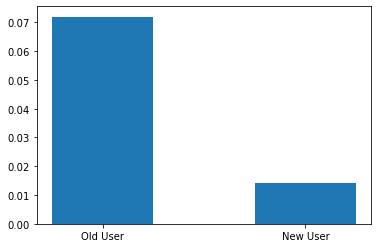

In [110]:
plt.bar(newuser_ratio.keys(), newuser_ratio.values(), width=0.5)
plt.xticks([0, 1], ['Old User', 'New User'])

## Machine learning
### Problems
- imblanced y
- imblanced country-wise
- imblanced new_user


In [38]:
# import libraries
from sklearn.model_selection import train_test_split, GridSearchCV

In [113]:
df_dummy = pd.get_dummies(df)

In [116]:
df_dummy = df_dummy[['age', 'new_user', 'total_pages_visited', 'country_China',
       'country_Germany', 'country_UK', 'country_US', 'source_Ads',
       'source_Direct', 'source_Seo', 'converted']]

In [124]:
X = df_dummy[['age', 'new_user', 'total_pages_visited', 'country_China',
       'country_Germany', 'country_UK', 'country_US', 'source_Ads',
       'source_Direct', 'source_Seo']]
y = df_dummy[['converted']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [125]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

C:\Users\Jun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9849462365591398

In [126]:
rfc.feature_importances_

array([0.11314692, 0.03712258, 0.80811306, 0.0223811 , 0.00274404,
       0.00390265, 0.00411148, 0.00264541, 0.00290433, 0.00292843])

([<matplotlib.axis.YTick at 0x1ddb26c7f48>,
 [Text(0, 0, 'age'),
  Text(0, 0, 'new_user'),
  Text(0, 0, 'total_pages_visited'),
  Text(0, 0, 'country_China'),
  Text(0, 0, 'country_Germany'),
  Text(0, 0, 'country_UK'),
  Text(0, 0, 'country_US'),
  Text(0, 0, 'source_Ads'),
  Text(0, 0, 'source_Direct'),
  Text(0, 0, 'source_Seo')])

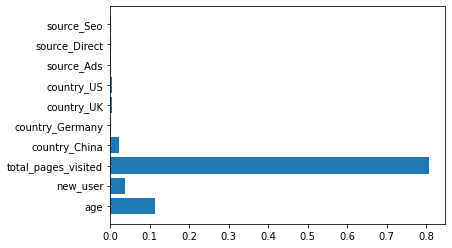

In [127]:
plt.barh(range(len(rfc.feature_importances_)), rfc.feature_importances_)
plt.yticks(range(len(rfc.feature_importances_)), X.columns)

In [128]:
X = X.drop(columns=['total_pages_visited'])

In [130]:
X_train1,X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25, random_state=10)

In [131]:
rfc.fit(X_train1, y_train1)

C:\Users\Jun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [133]:
rfc.score(X_test1, y_test1)

0.9674636306135357

([<matplotlib.axis.YTick at 0x1ddb68846c8>,
 [Text(0, 0, 'age'),
  Text(0, 0, 'new_user'),
  Text(0, 0, 'country_China'),
  Text(0, 0, 'country_Germany'),
  Text(0, 0, 'country_UK'),
  Text(0, 0, 'country_US'),
  Text(0, 0, 'source_Ads'),
  Text(0, 0, 'source_Direct'),
  Text(0, 0, 'source_Seo')])

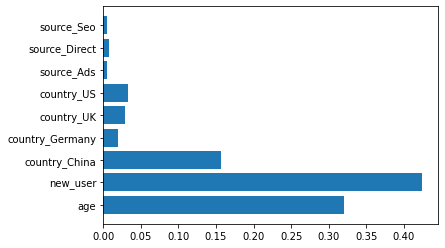

In [134]:
plt.barh(range(len(rfc.feature_importances_)), rfc.feature_importances_)
plt.yticks(range(len(rfc.feature_importances_)), X.columns)

### Conclusion and suggestions
- China has a huge amount of customers, yet the convert rate is quite low, need to find out the reason, for example, content? design? language?
- young customers have a high convertion rate, need to improve the customer experience of 'old' customers
- bring back old users, which has a higher converstion rate. Targeted email?